In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
titanic_train = pd.read_csv("C:/Users/USER/Desktop/business.csv")

In [4]:
titanic_train.shape

(20641, 14)

In [5]:
titanic_train.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
1,BDCQ.SEA1AA,2011.09,78324.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
2,BDCQ.SEA1AA,2011.12,85850.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
3,BDCQ.SEA1AA,2012.03,90743.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
4,BDCQ.SEA1AA,2012.06,81780.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN


In [6]:
del titanic_train["Period"]

In [7]:
titanic_train.head()

,Series_reference,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,80078.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
1,BDCQ.SEA1AA,78324.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
2,BDCQ.SEA1AA,85850.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
3,BDCQ.SEA1AA,90743.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
4,BDCQ.SEA1AA,81780.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN


In [8]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

Index(['Series_reference', 'Suppressed', 'STATUS', 'UNITS', 'Subject', 'Group',
       'Series_title_1', 'Series_title_2', 'Series_title_3'],
      dtype='object')


In [9]:
titanic_train[categorical].describe()

,Series_reference,Suppressed,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,Series_title_3
count,20641,2839,20641,20641,20641,20641,20641,20641,20641
unique,462,1,3,2,1,5,3,116,3
top,BDCQ.SEA1AA,Y,F,Number,Business Data Collection - BDC,Territorial authority by employment variable,Filled jobs,Auckland,Actual
freq,46,2839,14630,12496,20641,9277,8649,446,14521


In [11]:
titanic_train["Subject"][0:30]

0     Business Data Collection - BDC
1     Business Data Collection - BDC
2     Business Data Collection - BDC
3     Business Data Collection - BDC
4     Business Data Collection - BDC
5     Business Data Collection - BDC
6     Business Data Collection - BDC
7     Business Data Collection - BDC
8     Business Data Collection - BDC
9     Business Data Collection - BDC
10    Business Data Collection - BDC
11    Business Data Collection - BDC
12    Business Data Collection - BDC
13    Business Data Collection - BDC
14    Business Data Collection - BDC
15    Business Data Collection - BDC
16    Business Data Collection - BDC
17    Business Data Collection - BDC
18    Business Data Collection - BDC
19    Business Data Collection - BDC
20    Business Data Collection - BDC
21    Business Data Collection - BDC
22    Business Data Collection - BDC
23    Business Data Collection - BDC
24    Business Data Collection - BDC
25    Business Data Collection - BDC
26    Business Data Collection - BDC
2

In [15]:
titanic_train["Series_title_2"].unique()

array(['Agriculture, Forestry and Fishing', 'Mining', 'Manufacturing',
       'Electricity, Gas, Water and Waste Services', 'Construction',
       'Wholesale Trade', 'Retail Trade',
       'Accommodation and Food Services',
       'Transport, Postal and Warehousing',
       'Information Media and Telecommunications',
       'Financial and Insurance Services',
       'Rental, Hiring and Real Estate Services',
       'Professional, Scientific and Technical Services',
       'Administrative and Support Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance',
       'Arts and Recreation Services', 'Other Services', 'Total Industry',
       'Male', 'Female', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65 +', 'Northland',
       'Auckland', 'Waikato', 'Bay of Plenty', 'Gisborne', "Hawke's Bay",
       'Taranaki', 'Manawatu-Whanganui', 'Wellington', 'Tasman', 'Nelson',
    

In [16]:
char_Series_title_2 = titanic_train["Series_title_2"].astype(str) # Convert data to str

new_Series_title_2 = np.array([Series_title_2[0] for Series_title_2 in char_Series_title_2]) # Take first letter

new_Series_title_2 = pd.Categorical(new_Series_title_2)

new_Series_title_2 .describe()

,counts,freqs
categories,,
1,92,0.004457
2,184,0.008914
3,184,0.008914
4,184,0.008914
5,184,0.008914
6,184,0.008914
A,1663,0.080568
B,446,0.021607
C,1398,0.067729


In [17]:
dummy_vector = pd.Series([1,None,3,None,7,8])

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [18]:
titanic_train["Series_reference"].describe()

count           20641
unique            462
top       BDCQ.SEA1AA
freq               46
Name: Series_reference, dtype: object

In [20]:
missing = np.where(titanic_train["UNITS"].isnull() == True)
missing

(array([], dtype=int64),)

array([[<AxesSubplot:title={'center':'Magnitude'}>]], dtype=object)

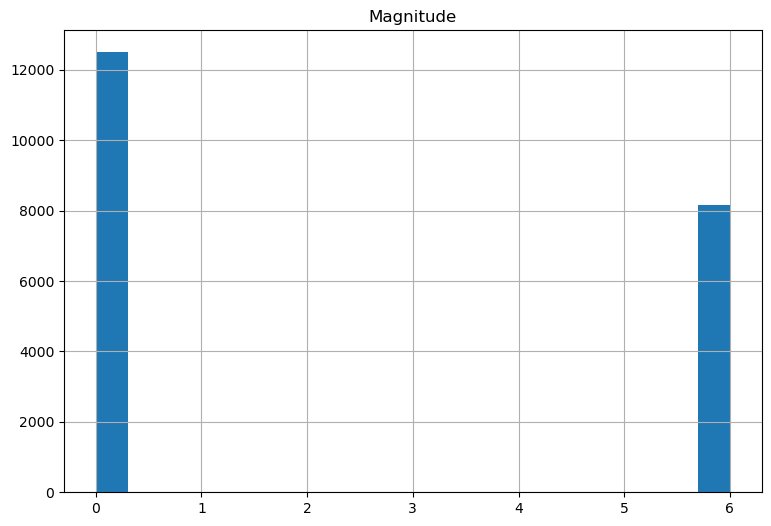

In [22]:
titanic_train.hist(column='Magnitude',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)     